<a href="https://colab.research.google.com/github/FranciaAlday/Proyectos/blob/main/Patrones/Tareas/Tarea2_MichiCoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre del equipo: MichiCoders


Integrantes:

*   Alday Martínez Francia Aide Verenice - 417031233
*   Berrio Mendoza Eileen Bjork - 317108969
*   Sánchez Domínguez Iván Amaury - 416101001
*   Malagón Gasca Miguel Ángel - 318356613





1. Realiza lo siguiente:

(a) Carga el dataset completo de Mnist y usa PCA para reducirlo a 2 componentes. Finalmente separa los datos
correspondientes a 1, 5 y 7. Gráfica los datos.

(b) Con el par de componentes y estas tres clases (1, 5 y 7) entrena un modelo K-NN con k = 3 y realiza un reporte de
clasificación.

(c) Gráfica la malla de clasificación de los datos para k = 3, 4, 5.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

In [ ]:
# Cargamos el conjunto de datos MNIST
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']
y = y.astype(np.uint8)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**(a)**

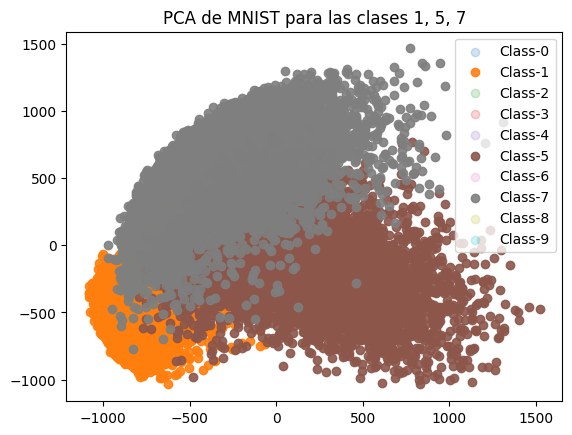

In [ ]:
# Aplicamos PCA para reducir a 2 componentes
pca_model = PCA(n_components=2)
X_pca = pca_model.fit_transform(X)

# Seleccionamos clases 1, 5 y 7
selected_classes = [1, 5, 7]
selected_indices = np.isin(y, selected_classes)
X_selected = X_pca[selected_indices]
y_selected = y[selected_indices]

# Graficamos los datos
select = selected_classes
PCA_comp_0, PCA_comp_1 = 0, 1

# Valores de cada clase
for num in range(0, 10):
    if num not in select:
        plt.scatter(X_selected[y_selected == num, PCA_comp_0][:10], X_selected[y_selected == num, PCA_comp_1][:10],
                    label=f'Class-{num}', alpha=0.2)
    elif num in select:
        plt.scatter(X_selected[y_selected == num, PCA_comp_0][:], X_selected[y_selected == num, PCA_comp_1][:],
                    label=f'Class-{num}', alpha=0.9)

plt.legend()
plt.title('PCA de MNIST para las clases 1, 5, 7')
plt.show()

**(b)**

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)

# Seleccionar las clases 1, 5 y 7
selected_classes = [1, 5, 7]
selected_indices = np.isin(y_selected, selected_classes)
X_selected_knn = X_selected[selected_indices]
y_selected_knn = y_selected[selected_indices]

# Entrenamos el modelo K-NN
X_Knn_PCA_model = knn_model.fit(X_selected_knn, y_selected_knn)

# Imprimimos el reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_selected_knn, X_Knn_PCA_model.predict(X_selected_knn)))

Reporte de clasificación:
              precision    recall  f1-score   support

           1       0.95      0.97      0.96      7877
           5       0.92      0.91      0.92      6313
           7       0.94      0.92      0.93      7293

    accuracy                           0.94     21483
   macro avg       0.94      0.94      0.94     21483
weighted avg       0.94      0.94      0.94     21483



**(c)**

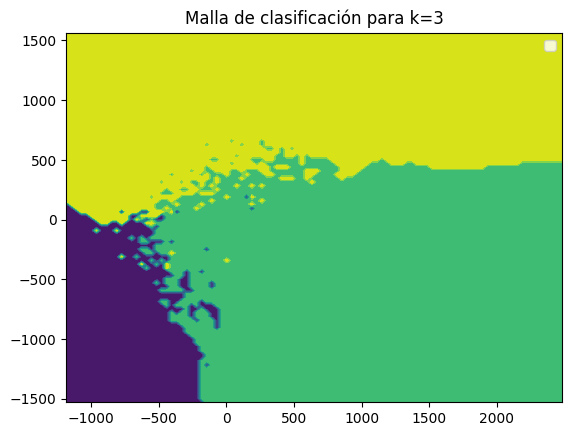

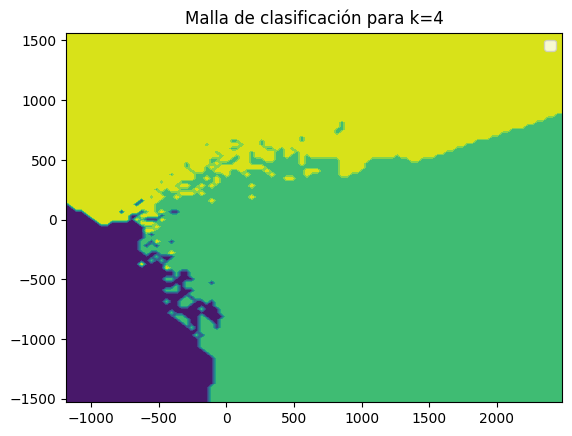

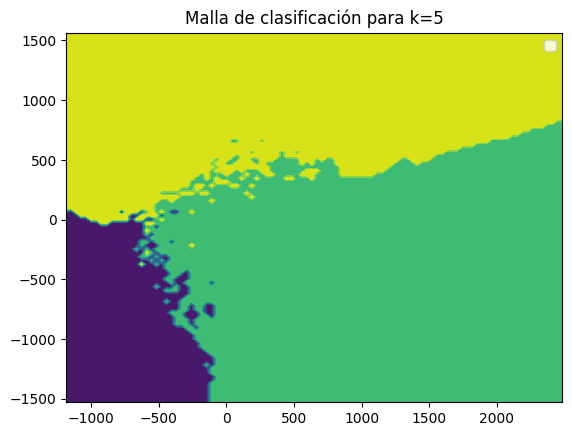

In [ ]:
# Crear un conjunto de puntos para la malla de clasificación
ancho_borde = 100
x_min, x_max = X_pca[:, 0].min()-ancho_borde, X_pca[:, 0].max() + ancho_borde
y_min, y_max = X_pca[:, 1].min()-ancho_borde, X_pca[:, 1].max() + ancho_borde
saltos = 100

# Crear una lista de valores de k
valores_k = [3, 4, 5]

# Iterar sobre los valores de k
for k in valores_k:
    # Configurar el modelo de KNN con el valor actual de k
    X_Knn_PCA_model.n_neighbors = k

    # Crear la malla de puntos en el espacio bidimensional
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    X_space = np.c_[xx.ravel(), yy.ravel()]

    # Predecir clases para cada punto en X_space
    y_space_pred = X_Knn_PCA_model.predict(X_space)

    # Graficar la malla de clasificación
    plt.figure()
    plt.contourf(xx, yy, y_space_pred.reshape(xx.shape), cmap='viridis', alpha=1)

    '''
    # Graficar los puntos de entrenamiento
    for num in range(0, 10):
        if num not in select:
            plt.scatter(X_pca[y == num, 0][:10], X_pca[y == num, 1][:10], label=f'Class-{num}', alpha=0.3)
        elif num in select:
            plt.scatter(X_pca[y == num, 0][:], X_pca[y == num, 1][:], label=f'Class-{num}', alpha=0.9, cmap='viridis')
    '''

    plt.title(f'Malla de clasificación para k={k}')
    plt.legend()
    plt.show()

2. Realiza lo siguiente:

(a) Carga el dataset completo de Mnist y usa LDA para reducirlo a 2 componentes. Finalmente separa los datos
correspondientes a 1, 5 y 7. Gráfica los datos.

(b) Con el par de componentes y estas tres clases (1, 5 y 7) entrena un modelo K-NN con k = 3 y realiza un reporte de
clasificación.

(c) Gráfica la malla de clasificación de los datos para k = 3, 4, 5.

**(a)**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

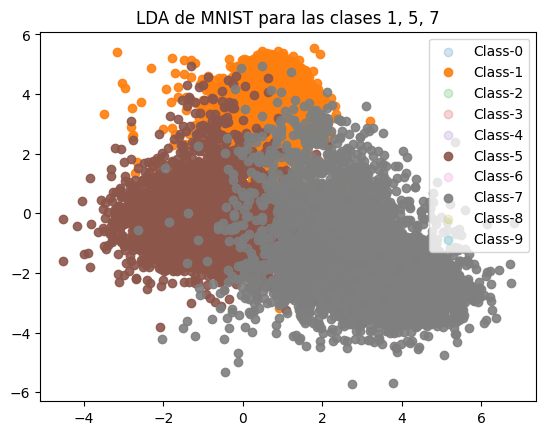

In [ ]:
# Aplicamos LDA para reducir a 2 componentes
lda_model = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda_model.fit_transform(X, y)

X_selected = X_lda[selected_indices]
y_selected = y[selected_indices]

# Graficamos los datos
LDA_comp_0, LDA_comp_1 = 0, 1

# Valores de cada clase
for num in range(0, 10):
    if num not in select:
        plt.scatter(X_selected[y_selected == num, LDA_comp_0][:10], X_selected[y_selected == num, LDA_comp_1][:10],
                    label=f'Class-{num}', alpha=0.2)
    elif num in select:
        plt.scatter(X_selected[y_selected == num, LDA_comp_0][:], X_selected[y_selected == num, LDA_comp_1][:],
                    label=f'Class-{num}', alpha=0.9)

plt.legend()
plt.title('LDA de MNIST para las clases 1, 5, 7')
plt.show()


**(b)**

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)

# Seleccionar las clases 1, 5 y 7
selected_classes = [1, 5, 7]
selected_indices = np.isin(y_selected, selected_classes)
X_selected_knn = X_selected[selected_indices]
y_selected_knn = y_selected[selected_indices]

# Entrenamos el modelo K-NN
X_Knn_LDA_model = knn_model.fit(X_selected_knn, y_selected_knn)

# Imprimimos el reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_selected_knn, X_Knn_LDA_model.predict(X_selected_knn)))

Reporte de clasificación:
              precision    recall  f1-score   support

           1       0.98      0.98      0.98      7877
           5       0.96      0.96      0.96      6313
           7       0.97      0.97      0.97      7293

    accuracy                           0.97     21483
   macro avg       0.97      0.97      0.97     21483
weighted avg       0.97      0.97      0.97     21483



**(c)**

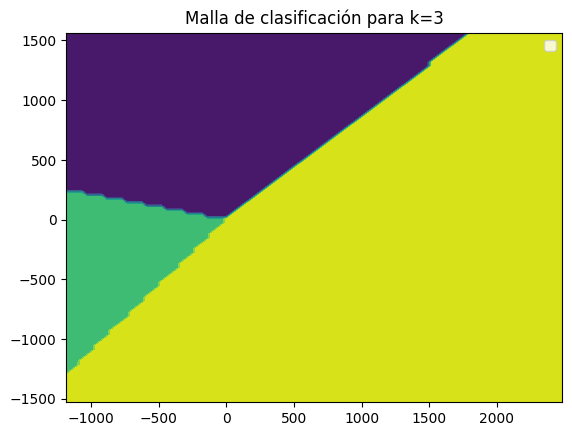

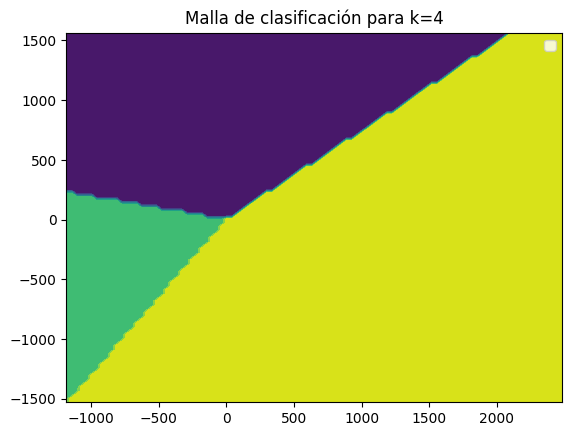

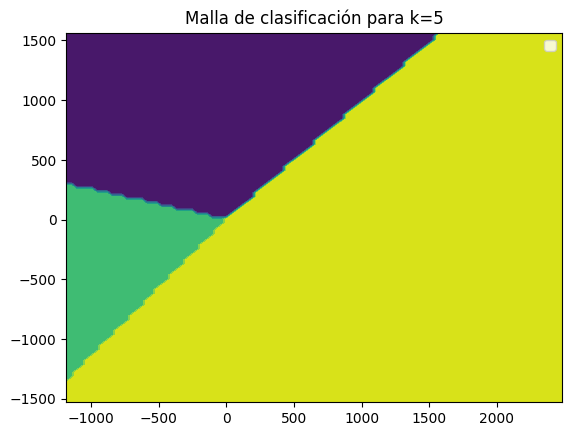

In [ ]:
# Crear un conjunto de puntos para la malla de clasificación
ancho_borde = 100
x_min, x_max = X_pca[:, 0].min()-ancho_borde, X_pca[:, 0].max() + ancho_borde
y_min, y_max = X_pca[:, 1].min()-ancho_borde, X_pca[:, 1].max() + ancho_borde
saltos = 100

# Crear una lista de valores de k
valores_k = [3, 4, 5]

# Iterar sobre los valores de k
for k in valores_k:
    # Configurar el modelo de KNN con el valor actual de k
    X_Knn_LDA_model.n_neighbors = k

    # Crear la malla de puntos en el espacio bidimensional
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    X_space = np.c_[xx.ravel(), yy.ravel()]

    # Predecir clases para cada punto en X_space
    y_space_pred = X_Knn_LDA_model.predict(X_space)

    # Graficar la malla de clasificación
    plt.figure()
    plt.contourf(xx, yy, y_space_pred.reshape(xx.shape), cmap='viridis', alpha=1)

    '''
    # Graficar los puntos de entrenamiento
    for num in range(0, 10):
        if num not in select:
            plt.scatter(X_pca[y == num, 0][:10], X_pca[y == num, 1][:10], label=f'Class-{num}', alpha=0.3)
        elif num in select:
            plt.scatter(X_pca[y == num, 0][:], X_pca[y == num, 1][:], label=f'Class-{num}', alpha=0.9, cmap='viridis')
    '''

    plt.title(f'Malla de clasificación para k={k}')
    plt.legend()
    plt.show()

3. Discutan en equipos los reportes de clasificación de los inciso 1b y 2b. ¿Qué modelo es mejor para separar estas clases y
clasificar las mediante K-NN?

**Respuesta:**

• El modelo LDA tiene una mayor precisión, recall y puntuación F1 en todas las clases comparado con el modelo PCA.

• Además, todas las métricas promedio (macro y ponderadas) y la exactitud total son más altas para el modelo LDA, esto es el resultado esperado pues LDA busca maximizar la separabilidad entre las clases conocidas en base a las etiquetas


• LDA parece ser más efectivo en separar las y predecir correctamente las etiquetas.

# 4. De acuerdo a lo visto en clase sobre el perceptrón simple.

(a) Mencionen el valor del peso wj correspondiente al valor del bias o sesgo que se obtiene en clase.

**Respuesta**:
Para el perceptrón simple visto en clase, el elemento del vector de pesos $w_j$ corresponde al primer elemento, pues el sesgo se añade al inicio del vector de entrada, para el perceptrón simple visto en clase, el valor es de $w_j[0]$=.00251

(b) Creen una función que calcule el valor predicho por la neurona sin modificar los pesos de la red.

(c) Cree una función que calcule el error cuadrático medio(ECM).

(d) Realiza una gráfica de linea del comportamiento del ECM para 30 épocas. Usando n = 1, .2, .02 ¿Cuál o cuales valores de n (taza de aprendizaje) funcionan de forma más adecuada?¿Cuales no? Argumente su respuestas ayudándose de la gráfica.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calcula el valor predicho por la neurona
def predict(inputs, weights):
  return np.dot(inputs, weights)

# Calcula el error cuadrático medio
def mean_squared_error(targets, predictions):
  return np.mean((targets - predictions) ** 2)

def train_perceptron(inputs, targets, learning_rate, epochs):
  num_inputs = inputs.shape[1]
  num_samples = inputs.shape[0]
  weights = np.random.rand(num_inputs)  # Inicializamos los pesos de manera aleatoria

  errors = []  # Almacenamos los errores para graficar

  for epoch in range(epochs):
    predictions = predict(inputs, weights)
    error = mean_squared_error(targets, predictions)
    errors.append(error)

    # Actualizamos los pesos utilizando el algoritmo de aprendizaje del perceptrón
    weights += learning_rate * np.dot(inputs.T, targets - predictions) / num_samples

  return errors

def plot_errors(errors, learning_rate):
  plt.plot(range(len(errors)), errors, label=f'Learning Rate = {learning_rate}')
  plt.xlabel('Época')
  plt.ylabel('Error Cuadrático Medio')
  plt.legend()
  plt.show()

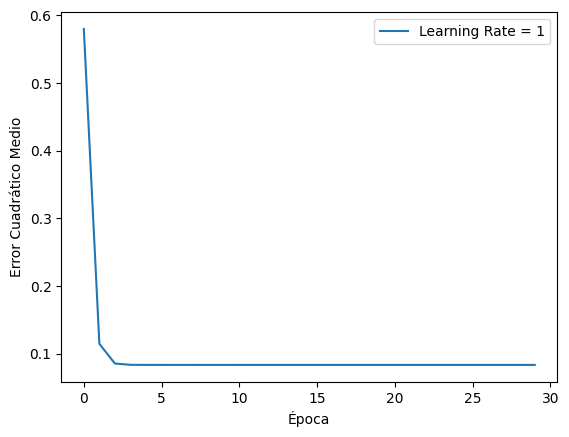

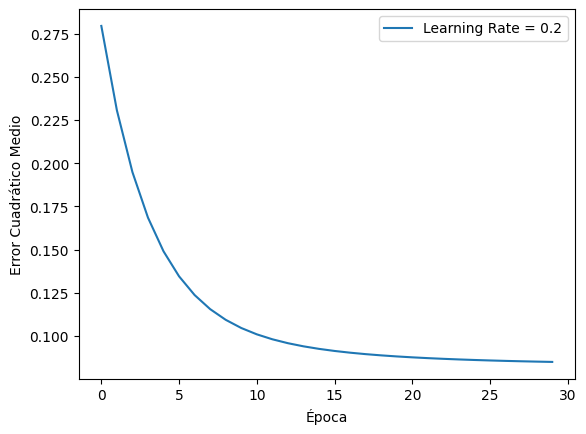

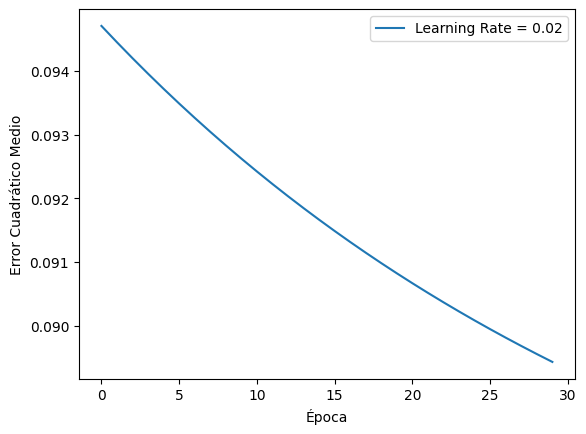

In [ ]:
# Datos de entrada y salida
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 0, 0, 1])

# Tasas de aprendizaje
learning_rates = [1, 0.2, 0.02]

# Número de épocas
epochs = 30

# Entrenamos y graficamos para diferentes tasas de aprendizaje
for learning_rate in learning_rates:
  errors = train_perceptron(inputs, targets, learning_rate, epochs)
  plot_errors(errors, learning_rate)

El valor de **0.2** es el más aducuado para la tasa de aprendizaje, ya que buscamos una tasa de aprendizaje que resulte en una curva suave y estable del error a lo largo de las épocas.

* **Convergencia rápida:** Una tasa de aprendizaje alta puede llevar a una convergencia más rápida al principio, pero también puede hacer que el entrenamiento sea inestable o incluso divergente en el futuro.

Esto pasa con una tasa de aprendizaje de 1.

* **Convergencia lenta o estancada:** Una tasa de aprendizaje demasiado baja puede hacer que el modelo tarde mucho en converger o incluso que se estanque en un mínimo local sin converger.

Esto pasa con una tasa de aprendizaje de 0.02.

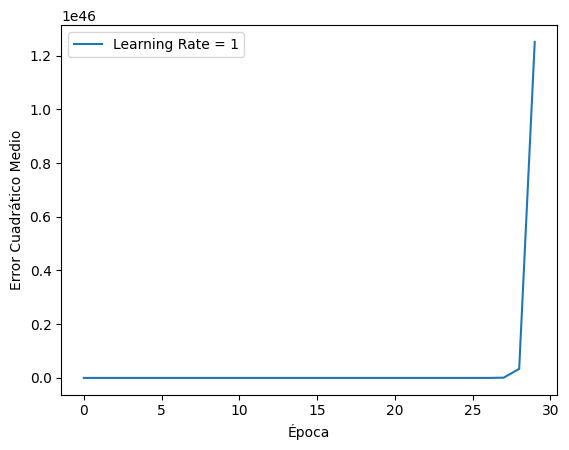

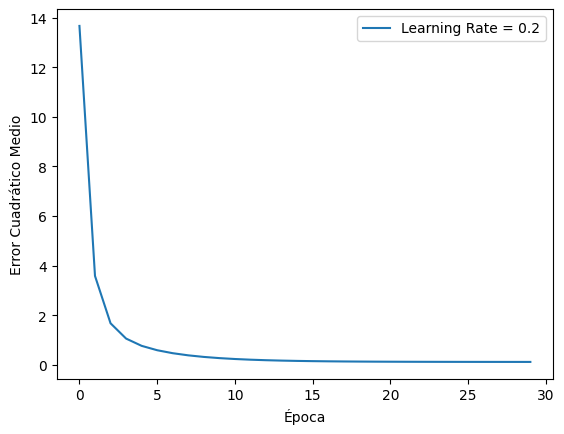

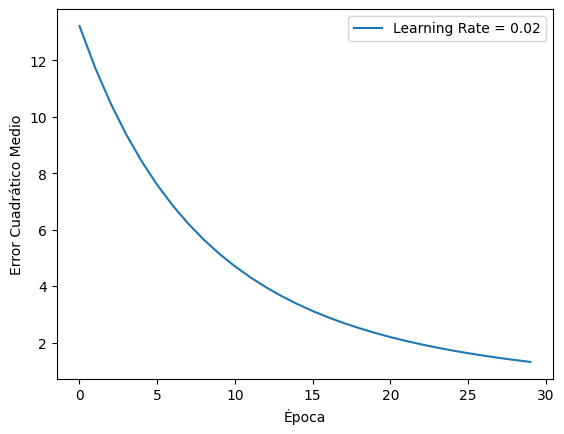

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from sklearn.decomposition import PCA

def load_data():
    # Cargar el conjunto de datos MNIST de Keras
    (images, labels), (_, _) = mnist.load_data()

    # Filtrar imágenes y etiquetas para solo incluir 1, 5 y 7
    indices = np.where((labels == 1) | (labels == 5) | (labels == 7))[0]
    images = images[indices]
    labels = labels[indices]

    # Normalizar las imágenes
    images = images / 255.0

    return images, labels

def apply_pca(images, n_components):
    pca = PCA(n_components=n_components)
    reduced_images = pca.fit_transform(images.reshape(images.shape[0], -1))
    return reduced_images

def predict(inputs, weights):
    return np.dot(inputs, weights)

def mean_squared_error(targets, predictions):
    return np.mean((targets - predictions) ** 2)

def train_perceptron(inputs, targets, learning_rate, epochs):
    num_inputs = inputs.shape[1]
    num_samples = inputs.shape[0]
    weights = np.random.rand(num_inputs)

    errors = []

    for epoch in range(epochs):
        predictions = predict(inputs, weights)
        error = mean_squared_error(targets, predictions)
        errors.append(error)

        weights += learning_rate * np.dot(inputs.T, targets - predictions) / num_samples

    return errors

def plot_errors(errors, learning_rate):
    plt.plot(range(len(errors)), errors, label=f'Learning Rate = {learning_rate}')
    plt.xlabel('Época')
    plt.ylabel('Error Cuadrático Medio')
    plt.legend()
    plt.show()

# Cargar datos
images, labels = load_data()

# Seleccionar solo algunas imágenes y etiquetas para este ejemplo
selected_indices = np.random.choice(len(labels), size=100, replace=False)
selected_images = images[selected_indices]
selected_labels = labels[selected_indices]

# Crear la matriz de entrada (flatten de las imágenes)
inputs = selected_images.reshape((len(selected_images), -1))

# Aplicar PCA para reducir la dimensionalidad
n_components = 20
reduced_inputs = apply_pca(inputs, n_components)

# Establecer las etiquetas deseadas para 1, 5 y 7
targets = np.where(selected_labels == 1, 1, np.where(selected_labels == 5, 0, -1))

# Tasa de aprendizaje
learning_rates = [1, 0.2, 0.02]

# Número de épocas
epochs = 30

# Entrenar y graficar para diferentes tasas de aprendizaje
for learning_rate in learning_rates:
    errors = train_perceptron(reduced_inputs, targets, learning_rate, epochs)
    plot_errors(errors, learning_rate)


 El mejor learning rate es 0.02.

 En la gráfica del learning rate de 0.2, el error cuadrático medio disminuye rápidamente al principio, pero luego comienza a aumentar. Esto indica que el modelo está sobreajustando los datos. En la gráfica del learning rate de 0.02, el error cuadrático medio disminuye de forma más constante y alcanza un valor mínimo más bajo. Esto indica que el modelo está generalizando mejor los datos.